In [1]:
import numpy as np
import pandas as pd
import spotipy
import spotipy.util as util
import matplotlib.pyplot as plt

In [2]:
artist_dic = pd.read_csv('./output/artist_dic.csv')

In [3]:
artist_dic.head()

,Unnamed: 0,artist_name,artist_uri,track_name,track_uri,artist_name_ct
0,0,ｍｉｙａｖｉ,spotify:artist:6eZ1mKC6Lv6ayxyo3VFl9b,s.m.f.b.,spotify:track:6WrACnAw7MJssvcGuflxEY,1
1,1,２８１４,spotify:artist:2wBpW4bAGYVe0yJcBeCTyd,恢复,spotify:track:2dFUtZtpWydAU4QMmUOK47,43
2,2,２８１４,spotify:artist:2wBpW4bAGYVe0yJcBeCTyd,ふわっと,spotify:track:6cNzmBNjtrrCTbRJ4NITk3,15
3,3,２８１４,spotify:artist:2wBpW4bAGYVe0yJcBeCTyd,真実の恋,spotify:track:2WQp0WTZFKQCM7Wvy3msGL,15
4,4,２８１４,spotify:artist:2wBpW4bAGYVe0yJcBeCTyd,遠くの愛好家,spotify:track:3tRNZWwNVqJc4Swf48Qu9Z,12


In [4]:
df = pd.read_csv('data/songs0.csv')

In [5]:
df.head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,0,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,0,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,0,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,0,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


In [6]:
def recommend_eval(df, artist_dic, top, split_ratio):
    res = []
    playlist_ct = df['pid'].max()
    for i in range(playlist_ct+1):
        df_cur = df[df['pid']==i]
        n, _ = df_cur.shape
        # split playlist into model input and hidden songs for evaluation
        ratio = int(split_ratio*n)
        train_artist_uri = df_cur['artist_uri'][:ratio].values
        train_track_uri = df_cur['track_uri'][:ratio].values
        test = df_cur['track_uri'][ratio:].values
        recommended_tracks = recommend_playlist(train_artist_uri, train_track_uri, n, top, artist_dic)
        r_precision = eval_playlist(test, recommended_tracks)
        res.append(r_precision)
    return res

In [7]:
def recommend_playlist(artist_list, track_list, n, top, artist_dic):
    """
    recommend popular songs of top artists in the given playlist
    """
    uni_artist = np.unique(artist_list)
    top_actual = 0
    res = []
    
    if top > len(uni_artist): 
        top_actual = len(uni_artist)
        avg_per_artist = n // len(uni_artist)
    else:
        top_actual = top
        avg_per_artist = n // top
    
    track_list = set(track_list)
    # get songs from top artists in the playlist
    for i in range(top_actual):
        uri = uni_artist[i]
        cur_match = artist_dic[artist_dic['artist_uri']==uri]['track_uri'].values
        cur_match = set(cur_match)
        cur_match = list(cur_match.difference(track_list))
        
        if len(cur_match) > avg_per_artist:
            cur_match = cur_match[:avg_per_artist]
        res += cur_match
    return res

In [8]:
def eval_playlist(test_tracks, recommended_tracks):
    #r-precision for evaluation
    test = set(test_tracks)
    pred = set(recommended_tracks)
    res = list(test & pred)
    return len(res) / len(test)

In [9]:
rr = recommend_eval(df, artist_dic, 10, 0.8)
np.array(rr)

array([0.        , 0.        , 0.07692308, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.1       , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.16666667, 0.        , 0.        , 0.        ,
       0.28125   , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14285714, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03225806, 0.        , 0.        , 0.125     , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07407407, 0.05882353, 0.        , 0.02857143, 0.25      ,
       0.        , 0.        , 0.02564103, 0.        , 0.     

In [10]:
re = np.take(rr, np.nonzero(rr)[0])

In [11]:
len(re)

165

In [12]:
np.mean(rr)

0.021821331882821322

In [13]:
np.mean(re)

0.13225049625952315

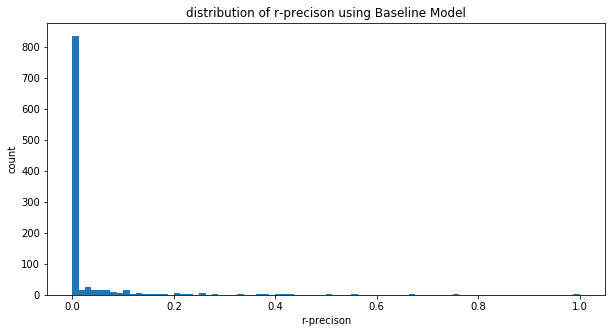

In [14]:
plt.figure(figsize=(10,5))
plt.title('distribution of r-precison using Baseline Model')
plt.xlabel('r-precison')
plt.ylabel('count')
plt.hist(rr, bins=80)
plt.show()

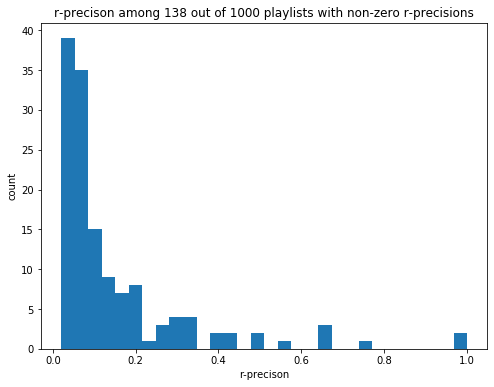

In [188]:
plt.figure(figsize=(8,6))
plt.title('r-precison among 138 out of 1000 playlists with non-zero r-precisions')
plt.xlabel('r-precison')
plt.ylabel('count')
plt.hist(re, bins=30)
plt.show()